In [16]:
from numpt import *

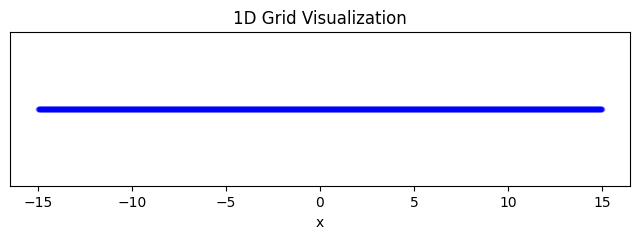

4865

In [27]:
#-----------------------------------------------------------
# Characteristic lengths of the problem
#-----------------------------------------------------------
Lx = 1 # Characteristic length along x

#-----------------------------------------------------------
# Problem's parameters
#-----------------------------------------------------------
hbar = 1
m = 1 # e-mass
wx = hbar / (m * Lx**2) # x confinement frequency

#-----------------------------------------------------------
# Simulation parameters
#-----------------------------------------------------------
xbounds = (-15*Lx, 15*Lx) # 10 times the confinement length
dx_max = 0.01 # Global maximum allowed spacing

#-----------------------------------------------------------
# Creating grid
#-----------------------------------------------------------
mesh_obj = Mesh(dims=1,
                 xbounds=xbounds,
                 dx_max=dx_max,
                 dx_func = None,
                 dy_func= None,
                 dz_func= None,
                 max_iter= 10)
dimx = mesh_obj.Nx
mesh_obj.visualize_grid(alpha = 0.1)
dimx

In [40]:
#-----------------------------------------------------------
# Obtaining canonical operators
#-----------------------------------------------------------
operators = canonic_ops(mesh_obj, additional_subspaces = None, hbar=1)
px2 = operators.get_ops()["p2"]
x2 = operators.get_ops()["x2"]

#-----------------------------------------------------------
# Constructing the Hamiltonian
#-----------------------------------------------------------
H = Hamiltonian(px2 / (2*m) + 0.5 * m * x2 * wx**2, mesh_obj)

In [41]:
k = 100
energies, wavefunctions = H.solve(k)

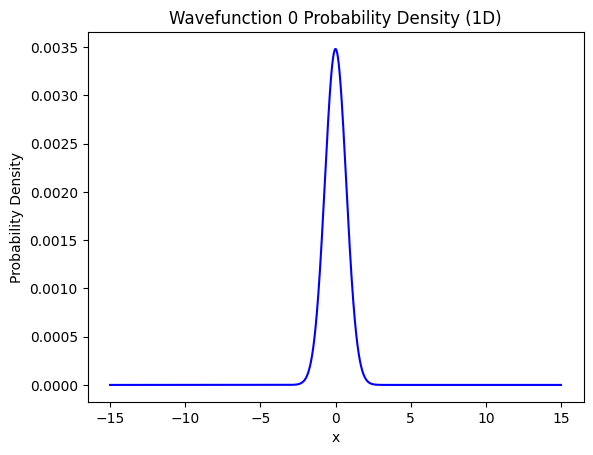

In [42]:
H.plot(0)

Text(0.5, 0, 'n')

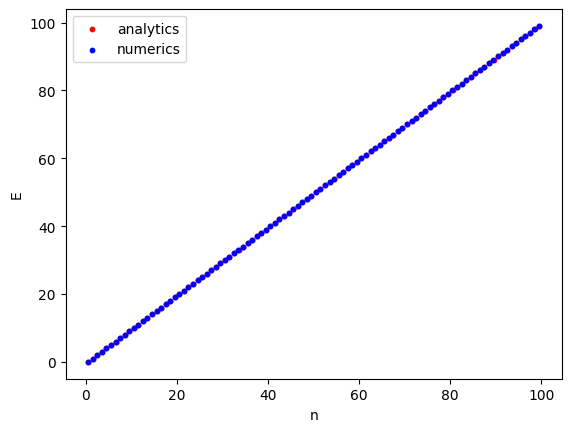

In [43]:
plt.scatter([hbar * wx *(n + 0.5) for n in range(0, k)], range(0, k), c="r", s = 10, label = "analytics")
plt.scatter(sorted(energies), range(0, k), c="b", s = 10, label = "numerics")
plt.legend()
plt.ylabel("E")
plt.xlabel("n")